# ECE 539 Final Project


Import Statements

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
D = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ECE539_FinalProject/parkinsons_updrs.csv")

In [ ]:
D.iloc[0]

subject#          1.000000
age              72.000000
sex               0.000000
test_time         5.643100
motor_UPDRS      28.199000
total_UPDRS      34.398000
Jitter(%)         0.006620
Jitter(Abs)       0.000034
Jitter:RAP        0.004010
Jitter:PPQ5       0.003170
Jitter:DDP        0.012040
Shimmer           0.025650
Shimmer(dB)       0.230000
Shimmer:APQ3      0.014380
Shimmer:APQ5      0.013090
Shimmer:APQ11     0.016620
Shimmer:DDA       0.043140
NHR               0.014290
HNR              21.640000
RPDE              0.418880
DFA               0.548420
PPE               0.160060
Name: 0, dtype: float64

Spliting for Perdiction of UPDRS total and UPDRS motor

In [ ]:
y_total = D["total_UPDRS"]
y_motor = D["motor_UPDRS"]
X = D.drop(["total_UPDRS","motor_UPDRS", "subject#"], axis = 1)
y_total = y_total.round(0)
y_motor = y_motor.round(0)

In [ ]:
X.shape

(5875, 19)

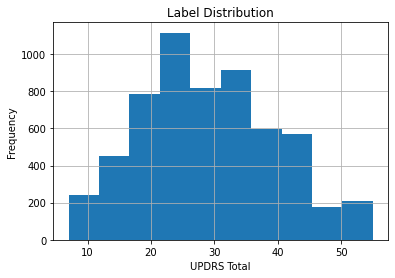

In [ ]:
ax = y_total.hist()
ax = plt.title("Label Distribution")
ax = plt.ylabel("Frequency")
ax = plt.xlabel("UPDRS Total")

## Making Dataset Smaller

In [ ]:
X_use_total, X_notused, y_used_total, y_notused = train_test_split(X, y_total, train_size = 0.05, stratify = y_total)
X_use_motor, X_notused, y_used_motor, y_notused = train_test_split(X, y_motor, train_size = 0.05, stratify = y_motor)

In [ ]:
X_use_total.shape

(293, 19)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_use_total, y_used_total, train_size = 0.8)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_train_acur= model.score(X_train, y_train)
y_test_acur = model.score(X_test, y_test)
acur = [y_train_acur, y_test_acur]
label = ["Train Accuracy", "Test Accuracy"]

Text(0.5, 1.0, 'Random Tree Forest Accuracy')

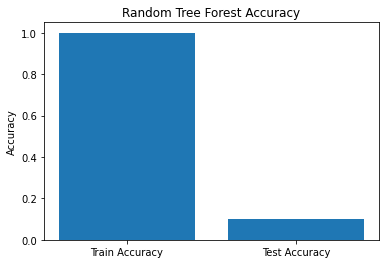

In [ ]:
plt.bar(label, acur)
plt.ylabel("Accuracy")
plt.title("Random Tree Forest Accuracy")


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Of Random Forest')

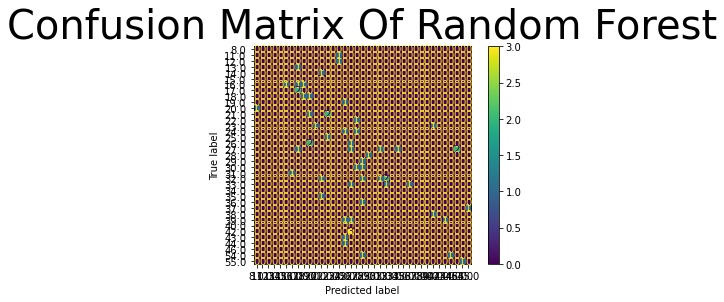

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.rcParams["figure.figsize"] = (5,5)
plt.title("Confusion Matrix Of Random Forest", fontsize = 40  )


## PCA Feature Reduction

## Random Forest Classifier

In [ ]:
accuracy = []
components = [i for i  in range(1,20)]

In [ ]:
for i in range(1,20):
  reduction = PCA(n_components=i)
  Xnew = reduction.fit_transform(X_use_total)
  model = RandomForestClassifier()
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, Xnew, y_used_total, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  accuracy.append(np.mean(n_scores))

Text(0.5, 1.0, 'Random Tree Classifier Accuracy With PCA Reduction ')

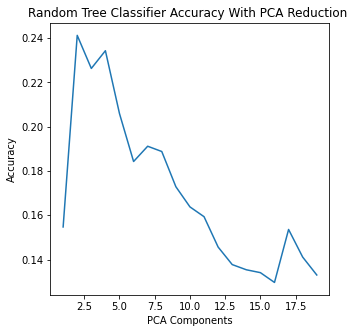

In [ ]:
plt.plot(components, accuracy)
plt.xlabel("PCA Components")
plt.ylabel("Accuracy")
plt.title("Random Tree Classifier Accuracy With PCA Reduction ")

In [ ]:
reduction = PCA(n_components=4)
Xnew = reduction.fit_transform(X_use_total)
X_train, X_test, y_train, y_test = train_test_split(Xnew, y_used_total, train_size = 0.8)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_train_acur= model.score(X_train, y_train)
y_test_acur = model.score(X_test, y_test)
acur = [y_train_acur, y_test_acur]
label = ["Train Accuracy", "Test Accuracy"]

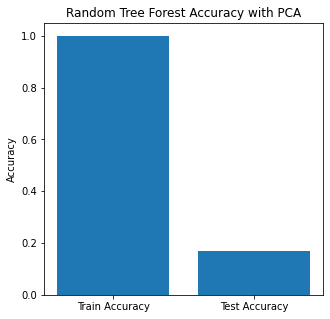

In [ ]:
plt.bar(label, acur)
plt.ylabel("Accuracy")
plt.title("Random Tree Forest Accuracy with PCA")
plt.rcParams["figure.figsize"] = (3,2)

## Binary Classification for RF

In [ ]:
def label_binary(label, array):
  for i in range(len(array)):
    if(array[i] == label):
      array[i] = 1
    else:
      array[i] = 0
  return array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_total, train_size = 0.8)

In [ ]:
y_test_conv = label_binary(32, np.array(y_test))
y_train_conv = label_binary(32, np.array(y_train))

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train_conv)
y_train_acur= model.score(X_train, y_train_conv)
y_test_acur = model.score(X_test, y_test_conv)
acur = [y_train_acur, y_test_acur]
label = ["Train Accuracy", "Test Accuracy"]

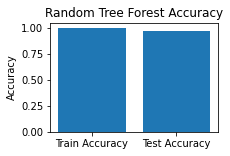

In [ ]:
plt.bar(label, acur)
plt.ylabel("Accuracy")
plt.title("Random Tree Forest Accuracy")
plt.rcParams["figure.figsize"] = (5,5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Of Random Forest')

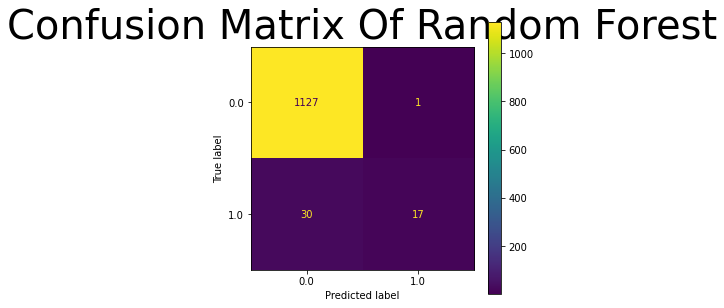

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test_conv)
plt.title("Confusion Matrix Of Random Forest", fontsize = 40  )

In [ ]:
all_labels = np.unique(y_total)

In [ ]:
accuracy = {}


In [ ]:
for i in all_labels:
  y_total_conv = label_binary(i, np.array(y_total))
  X_train, X_test, y_train, y_test = train_test_split(X, y_total, train_size = 0.8)
  model = RandomForestClassifier()
  model.fit(X_train, y_train_conv)
  y_train_acur= model.score(X_train, y_train_conv)
  y_test_acur = model.score(X_test, y_test_conv)
  accuracy.update({i:{"Train Accuracy": y_train_acur, "Test Accuracy": y_test_acur}})

## Trying to Predict Range Label Could Be In - Total UPDRS

In [ ]:
def range_label(array):
  for i in range(len(array)):
    if(array[i] <= 10):
      array[i] = 0
    elif(array[i] <= 20):
      array[i] = 1
    elif(array[i] <= 30):
      array[i] = 2
    elif(array[i] <= 40):
      array[i] = 3
    else:
      array[i] = 4
  return array

In [ ]:
y_conv = range_label(np.array(y_total))

Text(0, 0.5, 'Frequency')

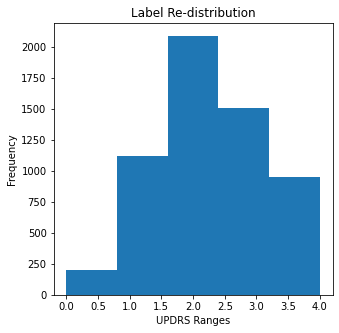

In [ ]:
plt.hist(y_conv, bins=5)
plt.title('Label Re-distribution')
plt.xlabel("UPDRS Ranges")
plt.ylabel("Frequency")


In [ ]:
y_test_range = range_label(np.array(y_test))
y_train_range = range_label(np.array(y_train))

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train_range)
y_train_acur= model.score(X_train, y_train_range)
y_test_acur = model.score(X_test, y_test_range)
acur = [y_train_acur, y_test_acur]
label = ["Train Accuracy", "Test Accuracy"]

Text(0.5, 1.0, 'Random Tree Forest Accuracy')

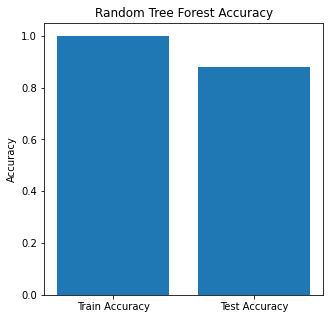

In [ ]:
plt.bar(label, acur)
plt.ylabel("Accuracy")
plt.title("Random Tree Forest Accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Of Random Forest')

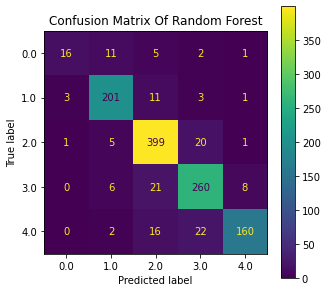

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test_range)
plt.title("Confusion Matrix Of Random Forest")

### Motor UPDRS

In [ ]:
X_train_motor, X_test_motor, y_train_motor, y_test_motor = train_test_split(X, y_motor, train_size = 0.8)

In [ ]:
y_test_range_motor = range_label(np.array(y_test_motor))
y_train_range_motor = range_label(np.array(y_train_motor))

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_motor, y_train_range_motor)
y_train_acur= model.score(X_train_motor, y_train_range_motor)
y_test_acur = model.score(X_test_motor, y_test_range_motor)
acur = [y_train_acur, y_test_acur]
label = ["Train Accuracy", "Test Accuracy"]
print("Accuracy: ",acur)

Accuracy:  [1.0, 0.8782978723404256]


Text(0.5, 1.0, 'Random Tree Forest Accuracy')

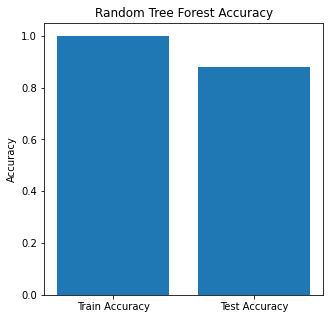

In [ ]:
plt.bar(label, acur)
plt.ylabel("Accuracy")
plt.title("Random Tree Forest Accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix Of Random Forest')

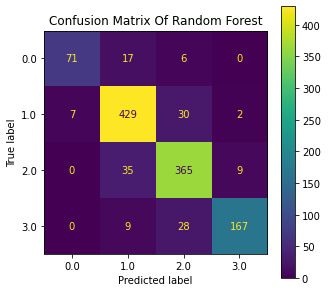

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_motor, y_test_range_motor)
plt.title("Confusion Matrix Of Random Forest")